<H2>Intro to CNN


<h3>What is CNN
<p>CNN is basically a form of convolutional Neural Network which basically makes work alot easier by doing feature extraction portion for us hence its a part of Deep Learning NeuralNets

It works on 2 levels they are:
<br>1. Feature Extraction
<br>2. Neural Network

<br>
1. Feature Extraction<br>
Initially an image is sent to the CNN as input. This inout image is mapped against various filters using convolution process which are initially prety simple filters later on gets more complecated to account for the fact that weather the image contains the charecter we are interest or not. 

<br>
2. Neural Network<br>
This is basically a fully connected Neural Network which will learn to get the flattern feature map as input and based on that predict weather an image is of a particulat class or not. it works regardless of the orientaion of the image

In [2]:
import tensorflow as tf
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import os


<h2> installing dependencies

<h2> Importing Data Set
We are going to work with MNIST dataset for 0-9 handwritten charecters which can be imported directly from tensorflow

output of the image:[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Shape of the image:(28, 28, 1)


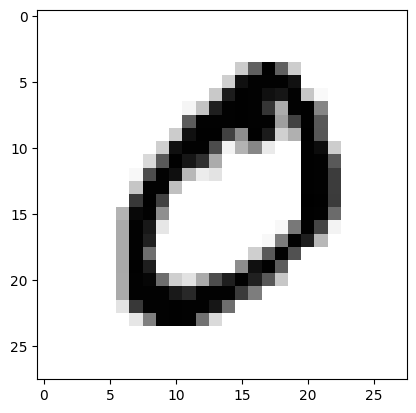

In [5]:
(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.mnist.load_data()
xtrain= xtrain.reshape((xtrain.shape[0],28,28,1))
xtest=xtest.reshape((xtest.shape[0],28,28,1))

ytrain=tf.keras.utils.to_categorical(ytrain)
ytest=tf.keras.utils.to_categorical(ytest)

#see the particular image from index
plt.imshow(xtrain[1],cmap=plt.cm.binary)
print(f'output of the image:{(ytrain[0])}')
print(f'Shape of the image:{xtrain[0].shape}') # the image dimension are 28*28



In [5]:
! pip install -U scikit-learn

^C


  Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 259.2 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 372.4 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 358.3 kB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/44.5 MB 2.3 MB/s eta 0:00:20
   ---------------------------------------- 0.3/44.5 MB 4.1 MB/s eta 0:00:11
   ---------------------------------------- 0.3/44.5 MB 4.1 MB


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<h3> Creating our model

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8500 - loss: 1.3940 - val_accuracy: 0.9111 - val_loss: 0.3953
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9289 - loss: 0.2859 - val_accuracy: 0.9330 - val_loss: 0.3002
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9391 - loss: 0.2605 - val_accuracy: 0.9241 - val_loss: 0.3556
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9425 - loss: 0.2543 - val_accuracy: 0.9452 - val_loss: 0.2151
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9409 - loss: 0.2531 - val_accuracy: 0.9428 - val_loss: 0.2649
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9467 - loss: 0.2243 - val_accuracy: 0.9400 - val_loss: 0.2620
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9406 - loss: 0.2565 - val_accuracy: 0.9526 - val_loss: 0.1822
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9482 - loss: 0.

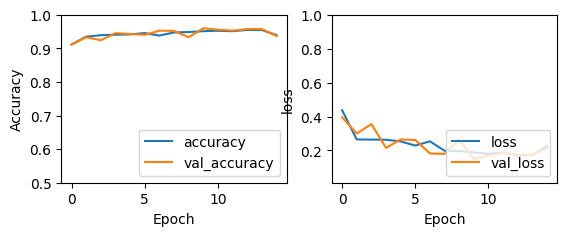

In [38]:
def creat_cnn_model():
    model=tf.keras.models.Sequential() # 

    model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) #32 filter 3*3 kernel size (28,28,1) 1 for black
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64,activation='relu'))
    model.add(tf.keras.layers.Dense(10,activation='softmax'))
    opt=tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    return model

def plot_metrics_for_training(history):

    plt.subplot(221)  #first image
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5,1])
    plt.legend(loc='lower right')

    plt.subplot(222)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.ylim([0.01,1])
    plt.legend(loc='lower right')

CNN_model=creat_cnn_model()
history_for_plotting=CNN_model.fit(xtrain,ytrain,epochs=15,validation_data=(xtest,ytest),shuffle=True)
plot_metrics_for_training(history_for_plotting)

<h3>4. Saving Your Model

In [30]:
def create_folder():
    try:
        os.mkdir('Model')
    except:
        pass
create_folder()
CNN_model.save_weights(r'Model\\SS_model.weights.h5')


<h3> Loading Model and Predicting

In [35]:
loaded_model=creat_cnn_model()
loaded_model.load.weights('Model\\SS_model.weights.h5')

print(loaded_model.evaluate(xtest,ytest))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

AttributeError: 'Sequential' object has no attribute 'load'

<h3> Predict From Loaded Model(From Dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted by model:9


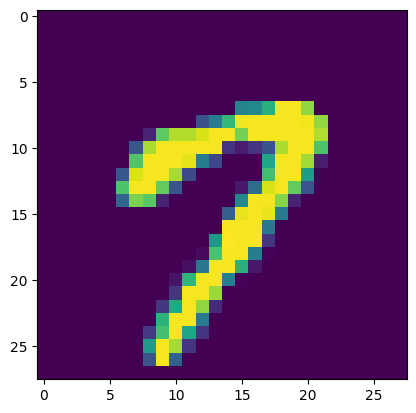

In [37]:
index=int(input(f'Enter Value between 0 to {len(xtrain)}'))
plt.imshow(xtrain[index])
output=loaded_model.predict(xtrain[index].reshape(1,28,28,1))
output=np.argmax(output[0])
print(f'Predicted by model:{output}')
